In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import legacy as legacy_optimizers

In [3]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [8]:
import zipfile
with zipfile.ZipFile('kaggle.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [9]:
train_generator = train_data_gen.flow_from_directory(
        'data/train', 
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [14]:
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

In [30]:
emotion_model_info = model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=7178 // 64
)

Epoch 1/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 54s 119ms/step - accuracy: 0.8588 - loss: 0.3905 - val_accuracy: 0.6221 - val_loss: 1.2175
Epoch 2/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.8906 - loss: 0.2716 - val_accuracy: 0.5000 - val_loss: 1.8985
Epoch 3/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 54s 119ms/step - accuracy: 0.8623 - loss: 0.3926 - val_accuracy: 0.6130 - val_loss: 1.2748
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 0.7969 - loss: 0.5469 - val_accuracy: 0.4000 - val_loss: 1.1578
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 54s 119ms/step - accuracy: 0.8593 - loss: 0.3876 - val_accuracy: 0.6164 - val_loss: 1.2609
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.9062 - loss: 0.3437 - val_accuracy: 0.6000 - val_loss: 1.7413
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 54s 119ms/step - accuracy: 0.8671 - loss: 0.3737 - val_accuracy: 0.6169 - val_loss: 1.2559
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.8750 - loss: 0.3085 - 

In [31]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")
print(f"Test loss: {test_loss:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6224 - loss: 1.3281
Test accuracy: 62.26%
Test loss: 1.33


In [32]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


In [33]:
# Get the true labels from the generator

true_classes = v6alidation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

In [34]:
# Print classification report
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       angry       0.12      0.13      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.16      0.12      0.13      1024
       happy       0.25      0.24      0.25      1774
     neutral       0.18      0.21      0.19      1233
         sad       0.19      0.21      0.20      1247
    surprise       0.13      0.13      0.13       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178



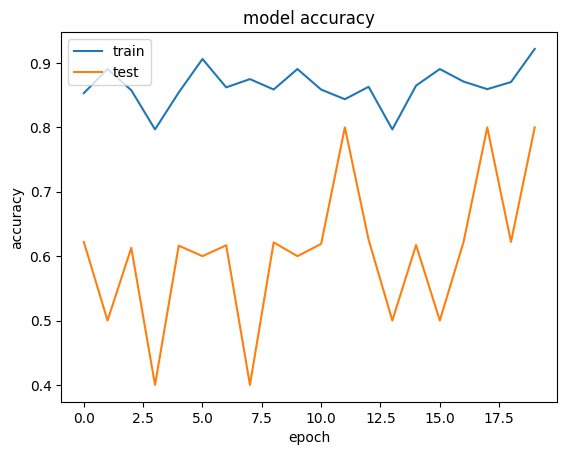

<Figure size 640x480 with 0 Axes>

In [35]:
# to plot the graph of accuracy and loss
import matplotlib.pyplot as plt
import numpy as np

# summarize history for accuracy
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('accuracy.png')

In [38]:
test_images, test_labels = next(validation_generator)

predictions = model.predict(test_images)


# Function to plot the results
def plot_image_predictions(images, labels, predictions):
    n = len(images)  # Number of images
    fig, axes = plt.subplots(n, 2, figsize=(10, 3*n))
    fig.subplots_adjust(hspace=0.9, wspace=0.4)

    for i, (img, label, prediction) in enumerate(zip(images, labels, predictions)):
        ax = axes[i, 0]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.title.set_text('Actual: {}'.format(np.argmax(label)))
        ax.axis('off')

        ax = axes[i, 1]
        bars = ax.bar(range(len(prediction)), prediction, color='blue')
        ax.set_xticks(range(len(prediction)))
        ax.set_xticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], rotation=90)
        ax.set_title("Predicted probabilities")
        ax.set_ylim([0, 1])
        # Highlight the prediction with the highest probability
        bars[np.argmax(prediction)].set_color('red')
    
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


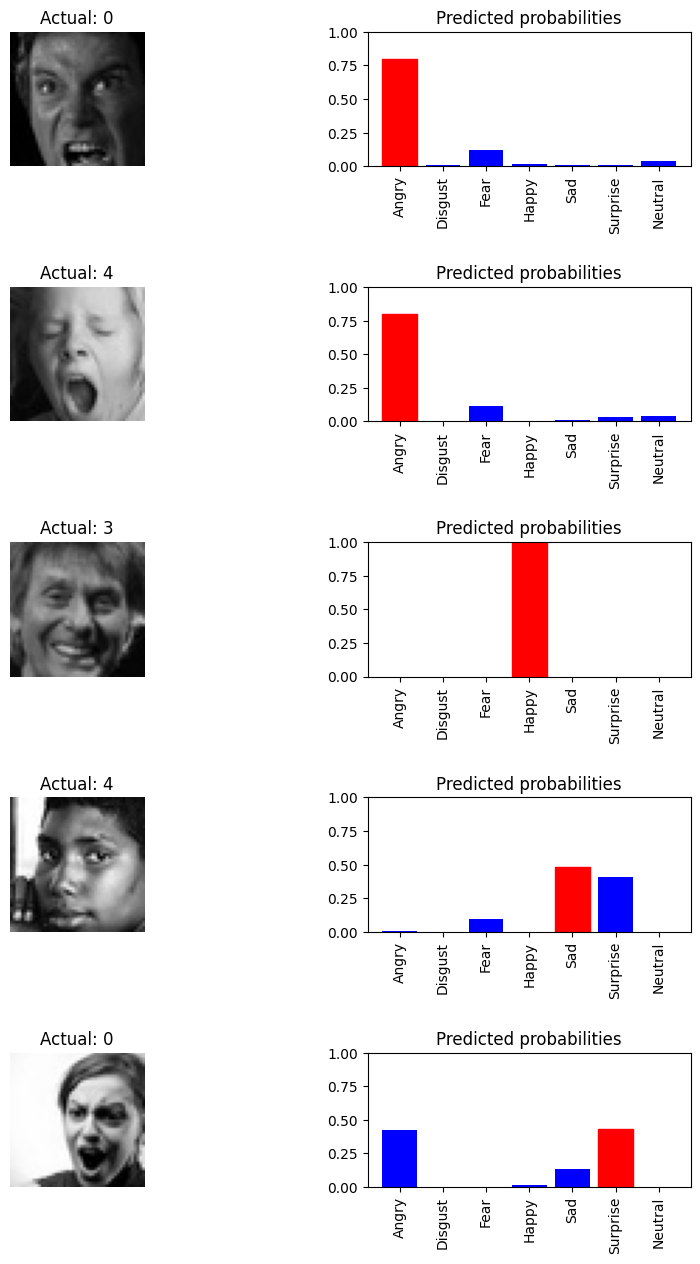

In [39]:

# Convert grayscale images to RGB for display
test_images_rgb = np.repeat(test_images, 3, axis=-1)

# Plot the image predictions for the first few test images
plot_image_predictions(test_images_rgb[:5], test_labels[:5], predictions[:5])

In [41]:
model.save('mood_model.keras')

In [49]:
from tensorflow.keras.models import load_model
model = load_model('mood_model.keras')

In [55]:
import cv2
        
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
frame = cv2.resize(frame, (48, 48))
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = gray/255.0
gray = gray.reshape(-1, 48, 48, 1)
prediction = model.predict(gray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [61]:
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the frame
    frame = cv2.resize(frame, (48, 48))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = gray/255.0
    gray = gray.reshape(-1, 48, 48, 1)
    
    # Predict using the model
    prediction = model.predict(gray)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    # Exit on pressing 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [64]:

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
from IPython.display import display, Image
from tensorflow.keras.models import load_model

# Load the model
model = load_model('mood_model.keras')

cap = cv2.VideoCapture(0)
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Preprocess the frame
        frame = cv2.resize(frame, (48, 48))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = gray/255.0
        gray = gray.reshape(-1, 48, 48, 1)

        # Predict using the model
        prediction = model.predict(gray)

        # Convert the frame to JPEG
        ret, jpeg = cv2.imencode('.jpg', frame)
        
        # Display the frame in JupyterLab
        display(Image(data=jpeg.tobytes()))

except KeyboardInterrupt:
    # When interrupted, release the capture
    cap.release()
    cv2.destroyAllWindows()